# Objetivo

O objetivo deste notebook é de demonstrar como fazer a visualização de imagens 3D utilizando slices e visualização volumétrica utilizando matplotlib.pyplot e itkwidgets respectivamente

In [1]:
import tifffile
from itkwidgets import view
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

%matplotlib notebook

In [2]:
img = tifffile.imread("../Aula-pratica4/data/mouse/MC0022_scan1_small.tif")

In [3]:
print('Shape: ', img.shape)
print('Dtype: ', img.dtype)
print('Max: ', np.max(img), ' min: ', np.min(img))

Shape:  (451, 274, 361)
Dtype:  uint16
Max:  36142  min:  31415


In [4]:
view(img)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageUS3; pr…

In [5]:
"""import itk

img = itk.imread('../Aula-pratica4/data/mouse/MC0022_scan1_small.tif')"""

img = tifffile.imread('../Aula-pratica4/data/MRI/T01C01/T01C01_flair.tif')

In [6]:
def make_interaction_function(img, axis):
    img_slice = np.take(img, 0, axis=axis)
    plt.figure()
    ax = plt.subplot(111)
    im = ax.imshow(img_slice, cmap='gray', vmin=np.min(img), vmax=np.max(img))
    ax.axis('off')
    
    def display_slice(pos):
        img_slice = np.take(img, pos, axis=axis)
        im.set_data(img_slice)
        ax.figure.canvas.draw()
        ax.set_title(pos)
    return display_slice

<IPython.core.display.Javascript object>


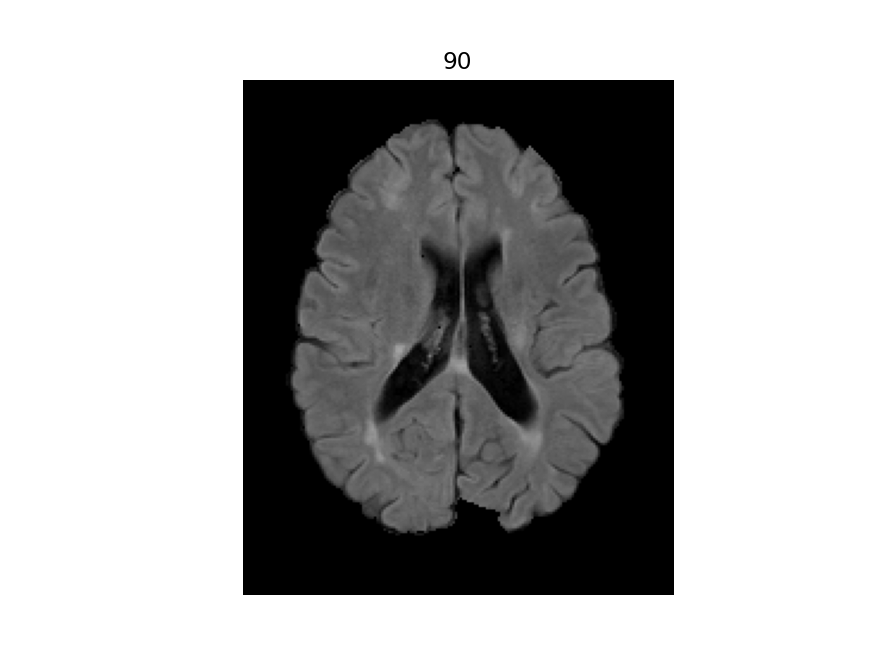

interactive(children=(IntSlider(value=90, description='pos', max=180, step=2), Output()), _dom_classes=('widge…

<function __main__.make_interaction_function.<locals>.display_slice(pos)>

In [7]:
#projecao axial
axis = 0
display_slice = make_interaction_function(img, axis)
pos_range = (0, img.shape[axis]-1, 2)
interact(display_slice, pos = pos_range)

<IPython.core.display.Javascript object>


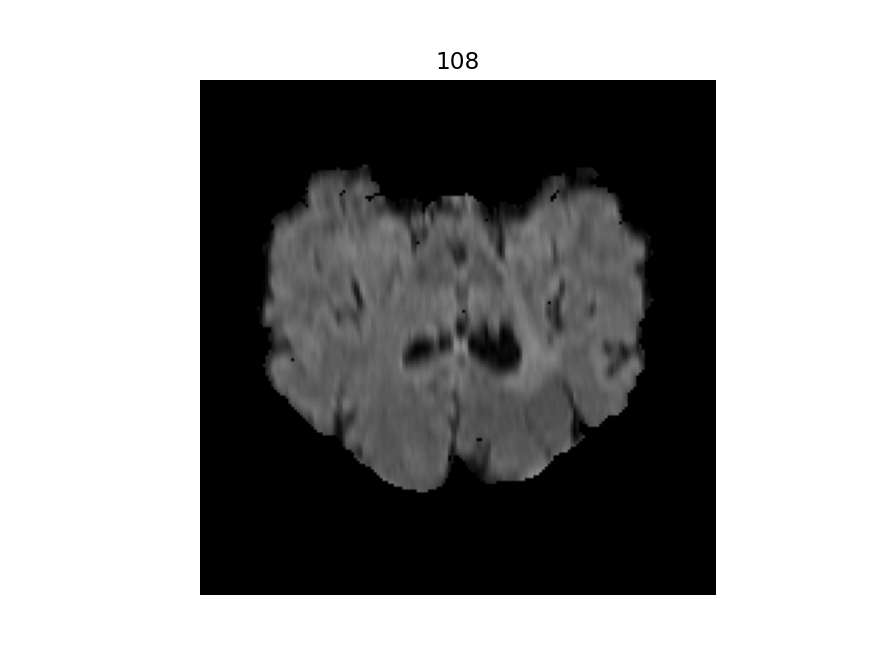

interactive(children=(IntSlider(value=108, description='pos', max=216, step=2), Output()), _dom_classes=('widg…

<function __main__.make_interaction_function.<locals>.display_slice(pos)>

In [8]:
#projecao coronal
axis = 1
display_slice = make_interaction_function(img, axis)
pos_range = (0, img.shape[axis]-1, 2)
interact(display_slice, pos = pos_range)

<IPython.core.display.Javascript object>


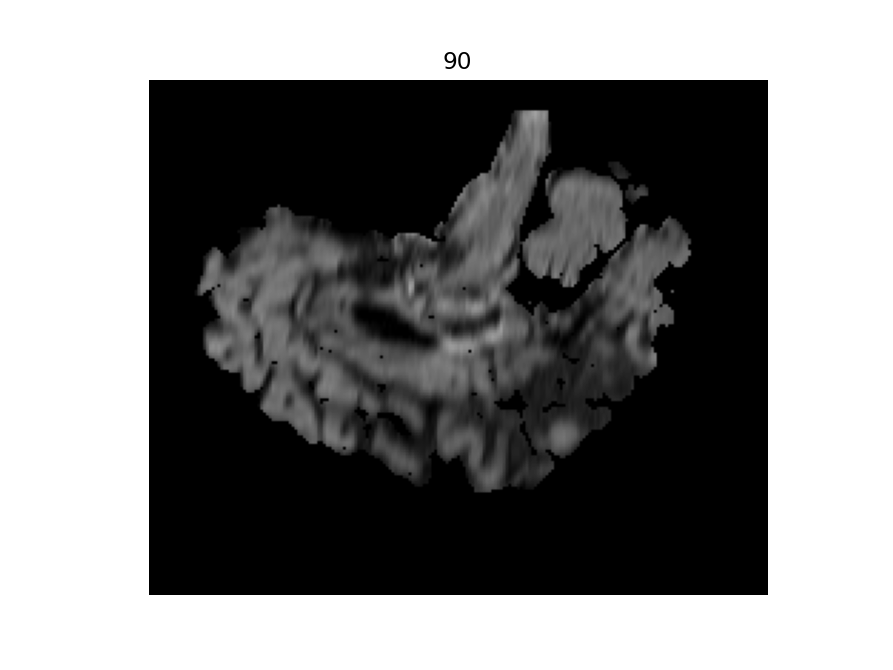

interactive(children=(IntSlider(value=90, description='pos', max=180, step=2), Output()), _dom_classes=('widge…

<function __main__.make_interaction_function.<locals>.display_slice(pos)>

In [9]:
#projecao sagital
axis = 2
display_slice = make_interaction_function(img, axis)
pos_range = (0, img.shape[axis]-1, 2)
interact(display_slice, pos = pos_range)